In [1]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.SVM 
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import r2_score , accuracy_score

In [2]:
#Reading a Dataset
data=pd.read_csv('Advertising.csv')

In [3]:
#Top 5 records of a dataset
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Renaming Unnamed: 0 to id
data=data.rename(columns={'Unnamed: 0':'id'})

#Top 5 records after renaming
data.head()

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Shape of a dataset
data.shape

(200, 5)

200 number of rows in a dataset

5 number of features in a dataset

In [6]:
#Information of a features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#Describing a Dataset
data.describe()

,id,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#Checking for NaN values 
data.isnull().sum()

id           0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No Missing values in a dataset

------

Pearson correlation of features in a dataset


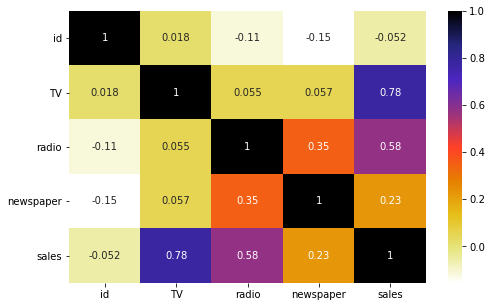

In [9]:
#Correlation of a features
#Using Pearson Correlation
plt.figure(figsize=(8,5))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [10]:
#Dropping id from a data as all unique values
data.drop('id',axis=1,inplace=True)

<AxesSubplot:>

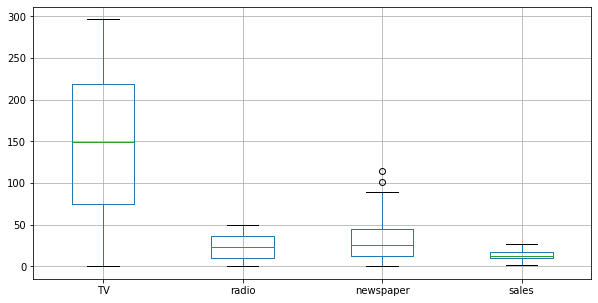

In [11]:
#Boxplot of all the columns in a data
data.boxplot(figsize=(10,5))

Outlier in newspaper replacing it with median

In [12]:
# data[data['newspaper']>100]=data['newspaper'].median()

Histogram of a features in dataset

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>,
        <AxesSubplot:title={'center':'sales'}>]], dtype=object)

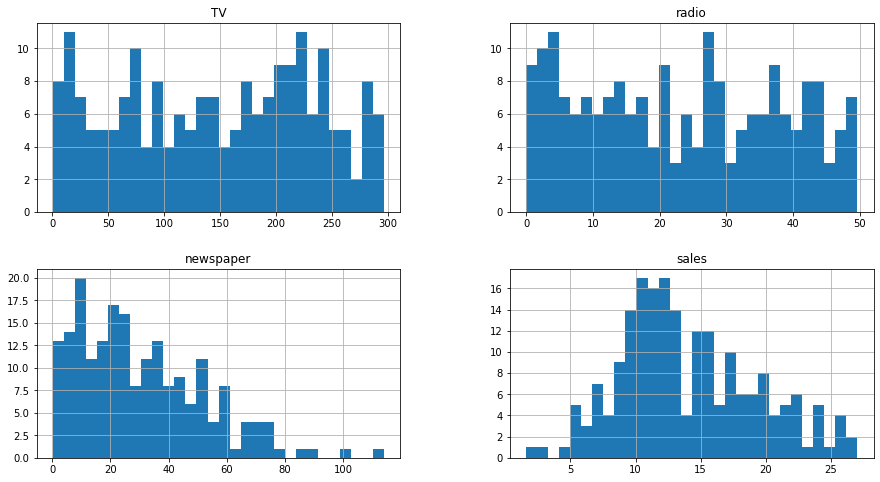

In [13]:
#Histogram of a dataset
data.hist(bins=30, figsize=(15, 8))

-----

Relationship between the features and label

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

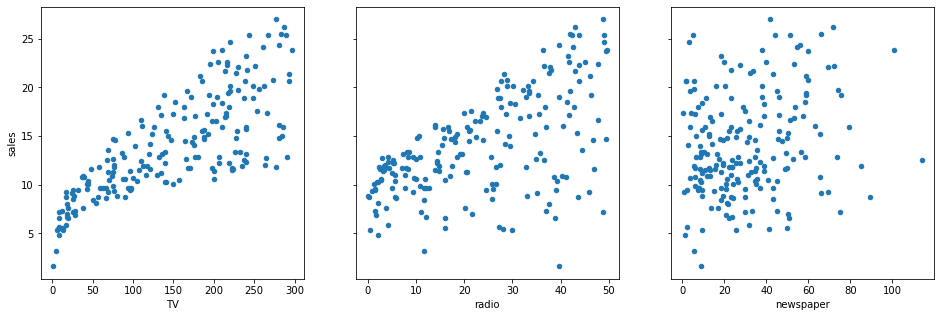

In [14]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 5))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

----------


In [15]:
#Dependent and Independent feature
X=data.drop('sales',axis=1)
y=data['sales']

In [16]:
#Using Linear Regression
lr=LinearRegression()
lr.fit(X,y)

# prediction=lr.predict(x_test)
train_predict=lr.predict(X)
# print(r2_score(prediction,y_test))
# print(accuracy_score(x_train,y_train))
print(r2_score(train_predict,y))

0.8854345262449441


In [17]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.58e-96
Time:                        13:27:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""